<a href="https://colab.research.google.com/github/rabbitew/ai-practice/blob/main/keras_fashionmnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.1


In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ['T-shirts/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
train_images.shape

(60000, 28, 28)

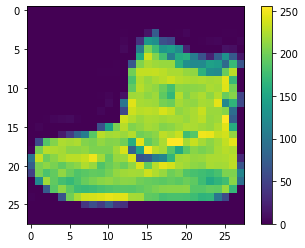

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

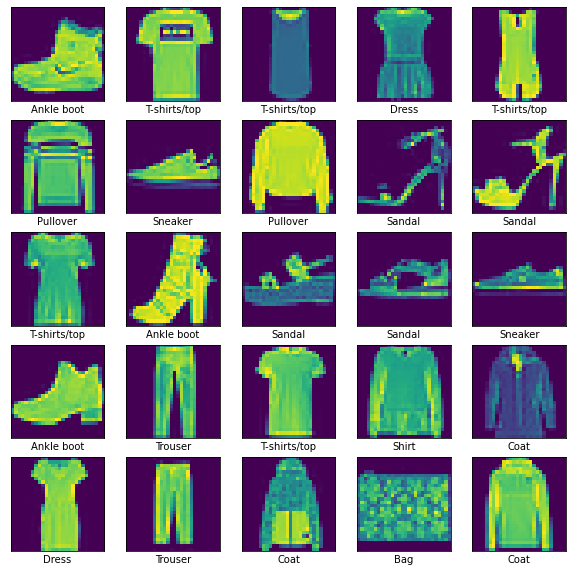

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25) :
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
model = keras.Sequential([
     keras.layers.Flatten(input_shape=(28, 28)),
     keras.layers.Dense(128, activation='relu'),
     keras.layers.Dense(10, activation='softmax')                  
])

In [ ]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6396 - accuracy: 0.7769
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3823 - accuracy: 0.8612
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3458 - accuracy: 0.8757
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3130 - accuracy: 0.8858
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3005 - accuracy: 0.8887


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("\n테스트 정확도:", test_acc)

313/313 - 1s - loss: 0.3548 - accuracy: 0.8728

테스트 정확도: 0.8727999925613403


In [ ]:
predictions = model.predict(test_images)

In [ ]:
predictions[0]

array([1.8198069e-05, 1.6044505e-09, 3.5889028e-07, 1.1802879e-07,
       1.8516634e-05, 8.8095674e-03, 1.5014188e-05, 2.6906071e-02,
       8.7918364e-05, 9.6414423e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
test_labels[0]

9